<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 3</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">

La teoria di Black e Scholes assume che l'evoluzione temporale del prezzo di mercato di un bene segua un moto Browniano geometrico con tasso di interesse privo di rischi costante $r$ e volatilità $\sigma$.

Le soluzioni analitiche di Black e Scholes per il prezzo al tempo $t<T$ sono:
- Prezzo della Call-option europea:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Prezzo della Put-option europea:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right],$$

$$d_2 = d_1 - \sigma\sqrt{T-t}$$
e
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
<br>è la funzione cumulativa della gaussiana a media nulla e varianza unitaria e<br><br>
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}.$$

<br>
    
Usando i parametri
- prezzo di mercato iniziale: $S(t=0)=100$
- istante di scadenza opzione: $T=1$
- strike price: $K=100$
- tasso d'interesse privo di rischi: $r=0.1$
- volatilità: $\sigma=0.25$

calcolare con metodi Monte Carlo al tempo $t=0$ il prezzo dell'opzione europea di call $𝐶[S(0),0]$ e di put $P[S(0),0]$.  
</div>

In [2]:
def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

In [3]:
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

call, put = black_scholes(S0, K, T, r, sigma)
attesi = [call,put]
print("***** BLACK-SCHOLES *****")
print("call: ", call)
print("put:  ", put)

***** BLACK-SCHOLES *****
call:  14.975790778311286
put:   5.4595325819072364


<div style="font-size: 0.43cm;">
Il costo dell'opzione, affinché il contratto sia equo, deve corrispondere al guadagno medio dell'holder.<br>
Una volta simulato il valore di mercato finale di un bene $S(T)$, il guadagno si calcola:

$$C = e^{-rT} \max(0,S(T)-K)$$
$$P = e^{-rT} \max(0,K-S(T))$$
    
Dove la funzione massimo fornisce la scelta più conveniente all'holder: ossia se far valere o meno il diritto dell'opzione.
    
</div>

<div style="font-size: 0.43cm;">Si sono utilizzati $M=10^5$ random walk geometrici per ottenere altrettanti valori finali $S(T)$ da cui si ricavano sia $C(S(T),T)$ che $P(S(T),T)$. Ognuno degli $N=100$ blocchi prende la media di $M/N$ dei valori trovati per $C(S(T),T)$ e $P(S(T),T)$. Di seguito vengono quindi mostrati i grafici con gli andamenti delle medie e delle relative incertezze in funzione del numero di blocchi.
</div>

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Si calcolino i prezzi richiesti estraendo direttamente i valori finali del prezzo di mercato $S(T)$ da una distribuzione di moto Browniano geometrico

La legge del moto Browniano geometrico per ogni tempo $t$ e con valore iniziale $S(0)$ è
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
dove $W(t)$ è una variabile distribuita secondo una distribuzione gaussiana di media nulla e varianza pari al tempo trascorso $t$.



</div>

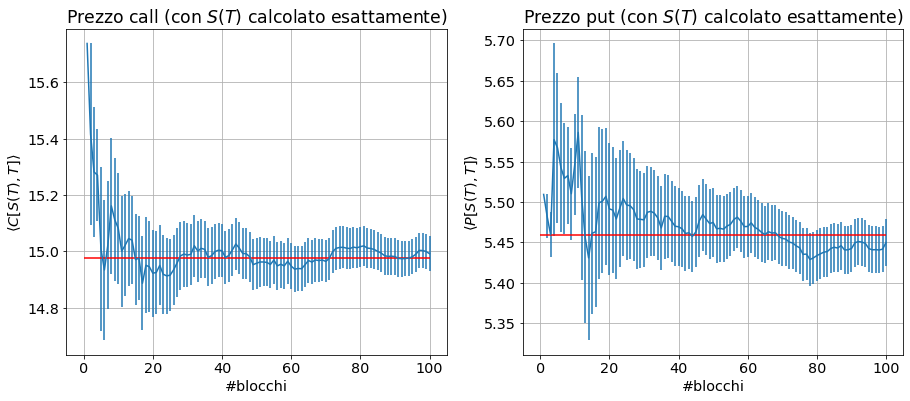

In [4]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

file = ["results/1_1_1.dat","results/1_1_2.dat"]
ordinate = [r'$\langle C[S(T),T] \rangle$',r'$\langle P[S(T),T] \rangle$']
title=[r"Prezzo call (con $S(T)$ calcolato esattamente)","Prezzo put (con $S(T)$ calcolato esattamente)"]

for k in range(2):
    ax = axs.flat[k]

    media, sigma_media = np.loadtxt(file[k], usecols=(0,1), delimiter=' ', unpack='true')
    ax.set(xlabel='valore', ylabel='conteggi normalizzati')
    x = np.arange(len(media))+1
    ax.errorbar(x,media,yerr=sigma_media)
    ax.hlines(attesi[k],0,len(media),"red");
    ax.set(xlabel='#blocchi')
    ax.set(ylabel=ordinate[k])
    ax.set(title=title[k])
    ax.grid(True)

<div style="font-size: 0.43cm;">Utilizzando tutti gli $N$ blocchi, si ottengono delle stime di
    
- $\langle C \rangle=15.00 \pm 0.06$
- $\langle P \rangle=5.44 \pm 0.03$

entrambe compatibili coi valori esatti calcolati con la formula analitica di Black-Scholes.
</div>

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Si calcolino i prezzi richiesti discretizzando la distribuzione di moto Browniano geometrico per il prezzo $S(T)$ dividendo l'intervallo $[0,T]$ in $100$ sottointervalli. La legge del moto Browniano geometrico progressivo è
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
con $Z_i$ distribuita secondo una distribuzione normale $\mathcal{N}(0,1)$


</div>

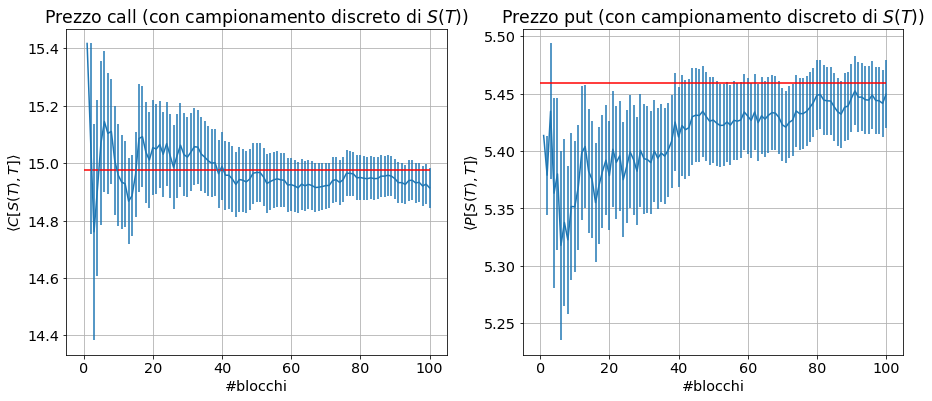

In [5]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

file = ["results/1_2_1.dat","results/1_2_2.dat"]
ordinate = [r'$\langle C[S(T),T] \rangle$',r'$\langle P[S(T),T] \rangle$']
title=[r"Prezzo call (con campionamento discreto di $S(T)$)","Prezzo put (con campionamento discreto di $S(T)$)"]

for k in range(2):
    ax = axs.flat[k]

    media, sigma_media = np.loadtxt(file[k], usecols=(0,1), delimiter=' ', unpack='true')
    ax.set(xlabel='valore', ylabel='conteggi normalizzati')
    x = np.arange(len(media))+1
    ax.errorbar(x,media,yerr=sigma_media)
    ax.hlines(attesi[k],0,len(media),"red");
    ax.set(xlabel='#blocchi')
    ax.set(ylabel=ordinate[k])
    ax.set(title=title[k])
    ax.grid(True)


<div style="font-size: 0.43cm;">Utilizzando tutti gli $N$ blocchi, si ottengono delle stime di
    
- $\langle C \rangle=14.93 \pm 0.07$
- $\langle P \rangle=5.44 \pm 0.03$

entrambe compatibili coi valori esatti calcolati con la formula analitica di Black e Scholes.
</div>